In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
import webdataset as wds
import json
import numpy as np
import png
import io
import PIL
figsize(20, 10)

In [68]:
meta = json.load(open("coco-shards/coco-meta.json"))
meta.keys()

dict_keys(['annotations_categories', 'person_categories', 'stuff_categories', 'panoptics_categories'])

In [28]:
stuffnames = {c["id"]: c["name"] for c in meta["stuff_categories"]}

In [57]:
ds = wds.WebDataset("coco-shards/coco-train-000000.tar")

In [75]:
src = iter(ds)

In [88]:
panopticnames = {x["id"]: x["name"] for x in meta["panoptics_categories"]}

{0, 101, 108, 112, 131, 133, 174, 182, 183}

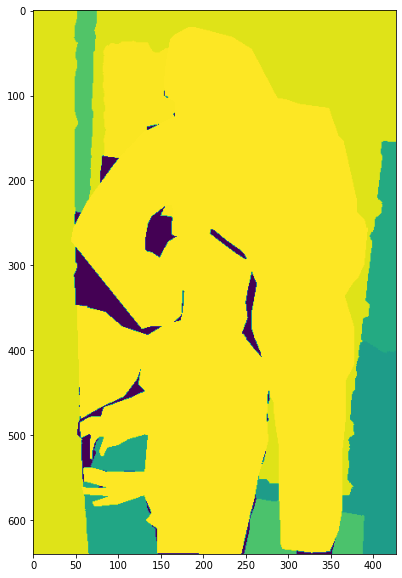

In [123]:
def pngvalues(data):
    r = png.Reader(file=io.BytesIO(sample["stuff.png"]))
    w, h, rows, info = r.read()
    image = np.array([np.frombuffer(row, dtype=uint8) for row in rows], dtype=np.uint8)
    assert image.shape == (h, w)
    return image

imshow(pngvalues(sample["stuff.png"]))
set(list(pngvalues(sample["stuff.png"]).ravel()))

None mat wall-concrete wall-other door-stuff floor-tile other 
(480, 640, 3)


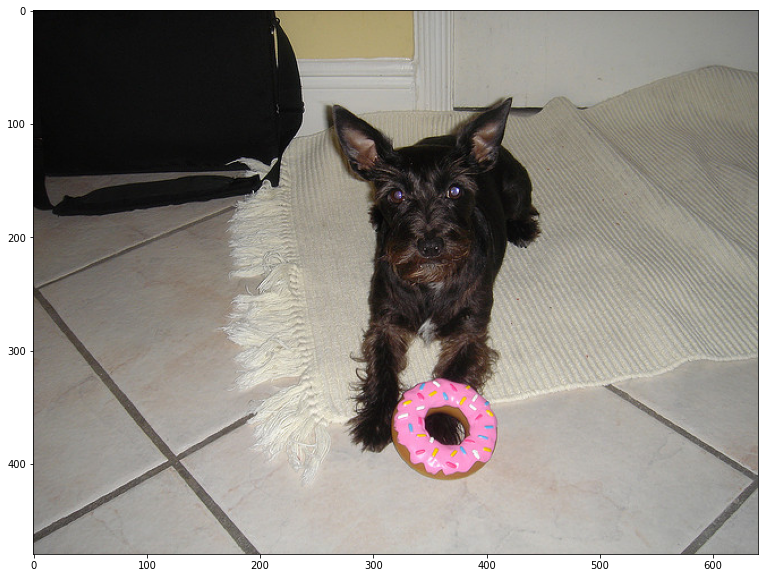

In [129]:
sample = next(src)

values = set(list(pngvalues(sample["stuff.png"]).ravel()))
for value in values:
    print(stuffnames.get(value), end=" ")
print()
panoptic = np.array(PIL.Image.open(io.BytesIO(sample["pan.png"])))
print(panoptic.shape)
image = PIL.Image.open(io.BytesIO(sample["jpg"]))
imshow(image)

In [130]:
info = json.loads(sample["json"])
info["panoptics"]


cats = {x["id"]: x["category_id"] for x in info["panoptics"][0]["segments_info"]}
cats
pvalues = set()
for row in panoptic[:, :]:
    drow = row[:, 0] + 256*row[:, 1] + 65536 * row[:, 2]
    pvalues.update(set(list(drow)))
for value in pvalues:
    if value == 0: continue
    print(panopticnames.get(cats[value]), end=" ")
print()


floor-other-merged rug-merged donut wall-other-merged dog backpack door-stuff 


In [43]:
src = iter(ds)

dict_keys(['__key__', 'jpg', 'json', 'pan.png', 'stuff.png'])


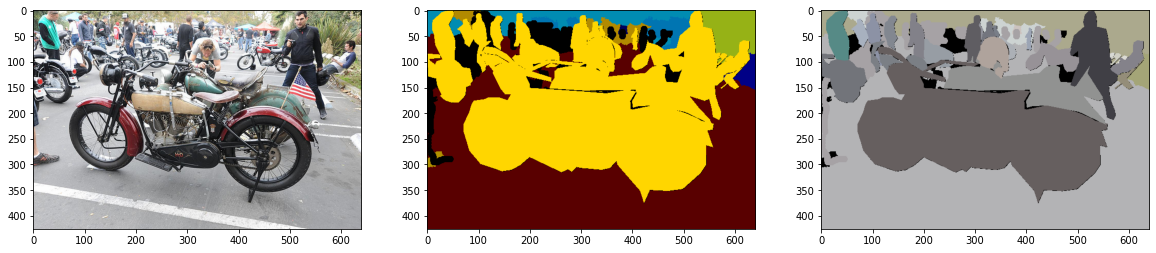

In [44]:
sample = next(src)

print(sample.keys())

subplot(131); imshow(sample["jpg"])
subplot(132); imshow(sample["stuff.png"])
subplot(133); imshow(sample["pan.png"])

In [55]:
sample["stuff.png"].getcolors()

[(302, (178, 146, 0)),
 (3549, (0, 117, 178)),
 (128419, (255, 214, 0)),
 (2745, (178, 138, 0)),
 (7348, (150, 178, 22)),
 (102055, (89, 0, 0)),
 (1731, (0, 0, 134)),
 (154, (0, 0, 89)),
 (16627, (0, 0, 0)),
 (9710, (0, 140, 178))]

In [33]:
labels = np.unique(sample["stuff.png"])
labels

array([0.        , 0.08627451, 0.34901962, 0.45882353, 0.5254902 ,
       0.5411765 , 0.54901963, 0.57254905, 0.5882353 , 0.69803923,
       0.8392157 , 1.        ], dtype=float32)

In [15]:
import pprint
pp = pprint.PrettyPrinter(indent=4, compact=True)

In [16]:
sample["json"].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id', 'annotations', 'captions', 'person_keypoints', 'stuff', 'panoptics'])

In [17]:
pp.pprint(sample["json"]["annotations"][0])

{   'area': 73205.52694999997,
    'bbox': [70.68, 70.3, 487.13, 305.65],
    'category_id': 4,
    'id': 154083,
    'image_id': 468493,
    'iscrowd': 0,
    'segmentation': [   [   160.47, 101.82, 135.63, 87.49, 113.66, 84.63,
                            108.89, 79.85, 113.66, 70.3, 132.77, 73.17, 154.74,
                            85.58, 176.7, 106.6, 192.94, 116.15, 234.97, 97.04,
                            309.47, 103.73, 296.1, 110.42, 240.7, 102.77,
                            206.31, 118.06, 203.45, 119.01, 241.65, 131.43,
                            242.61, 140.03, 191.99, 128.56, 199.63, 143.85,
                            200.58, 151.49, 301.83, 158.17, 348.63, 161.99,
                            388.75, 155.31, 406.9, 158.17, 395.43, 177.28,
                            396.39, 192.56, 400.21, 193.51, 440.33, 184.92,
                            468.03, 189.69, 502.41, 200.2, 528.2, 211.66,
                            532.98, 215.48, 557.81, 221.21, 555.9, 232.68,
        

In [18]:
pp.pprint(sample["json"]["captions"][0])

{   'caption': 'A red motorcycle parked in a parking space.',
    'id': 549131,
    'image_id': 468493}


In [19]:
pp.pprint(sample["json"]["person_keypoints"][0])

{   'area': 3287.49785,
    'bbox': [302.47, 51.25, 62.66, 83.12],
    'category_id': 1,
    'id': 1219746,
    'image_id': 468493,
    'iscrowd': 0,
    'keypoints': [   338, 88, 2, 343, 84, 2, 336, 84, 2, 348, 79, 2, 328, 78, 2,
                     357, 68, 2, 321, 67, 2, 361, 106, 2, 306, 101, 1, 355, 113,
                     2, 320, 106, 2, 346, 93, 2, 326, 92, 2, 351, 123, 2, 324,
                     124, 1, 0, 0, 0, 0, 0, 0],
    'num_keypoints': 15,
    'segmentation': [   [   316.11, 60.34, 309.29, 71.06, 307.99, 77.55, 309.62,
                            80.47, 303.12, 91.51, 302.47, 95.08, 308.64, 99.3,
                            307.67, 103.52, 312.86, 108.39, 323.58, 112.94,
                            332.34, 114.24, 336.24, 111.97, 336.24, 108.07,
                            338.19, 104.82, 340.78, 104.17, 342.41, 97.68,
                            347.28, 101.9, 351.5, 110.34, 350.52, 112.61,
                            344.68, 110.67, 340.78, 114.56, 338.51, 113.26,